In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd


In [2]:
pwd

'/home/davendra_glade_plus_catalog/Testing-anisotropy-with-GW-and-GRB/figures'

In [3]:
# read glade plus catalog
fname = "/home/davendra_glade_plus_catalog/gw-hands-on-school-2025/GLADE_plus_subset.txt"

# raw = np.genfromtxt(
#     fname,
#     dtype=str,
#     comments="#",    
#     invalid_raise=False
# )

# print(raw.shape)  

df = pd.read_csv(fname, sep='\s+', header=None, dtype=str)
raw = df.values

print(raw.shape)

(23181758, 4)


In [4]:
ra_str = raw[:, 0]
dec_str = raw[:, 1] 
dist_str = raw[:, 2]
z_str = raw[:, 3]

# Convert to float, handling missing values ('None', '')
def to_float(arr, bad_values=('None', '', 'null')):
    arr = np.asarray(arr, dtype=str)
    out = np.full(arr.shape, np.nan, dtype=float)
    mask = np.ones(arr.shape, dtype=bool)
    for bad in bad_values:
        mask &= (arr != bad)
    # only convert “good” strings
    out[mask] = arr[mask].astype(float)
    return out

ra_deg  = to_float(ra_str)
dec_deg = to_float(dec_str)
dist_Mpc = to_float(dist_str)
z       = to_float(z_str)

print("Loaded:", len(ra_deg), "rows")
print("Example:", ra_deg[:3], dec_deg[:3], z[:3])

Loaded: 23181758 rows
Example: [192.721451 188.860123 267.360474] [41.120152 14.49632  70.144341] [0.001733   0.00357327 0.00280305]


In [5]:
# convert to radians for plotting
ra_rad  = np.deg2rad(ra_deg)
dec_rad = np.deg2rad(dec_deg)# Wrap RA around 180° and flip so RA increases to the left (sky convention)
ra_wrapped = np.remainder(ra_rad + np.pi, 2 * np.pi) - np.pi
ra_wrapped = -ra_wrapped

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.grid': True,
    'grid.alpha': 0.3,
})


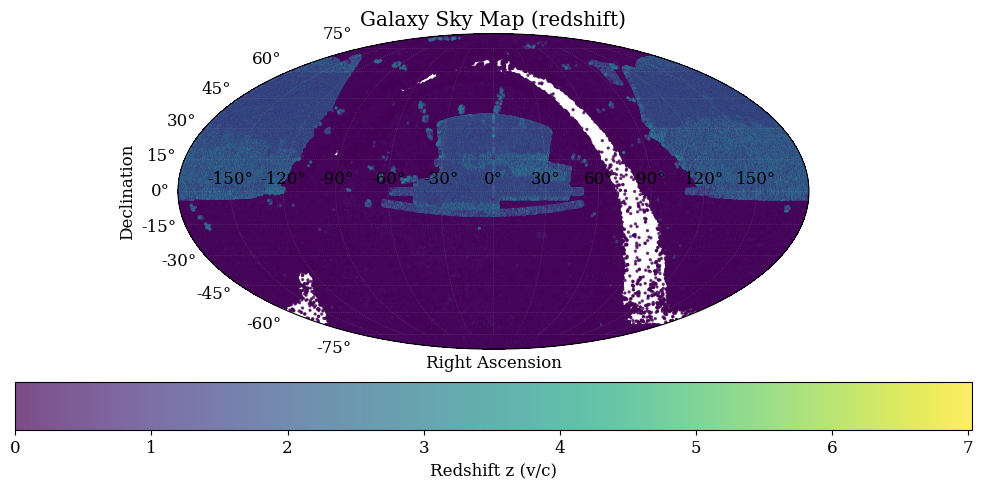

In [7]:
# Plot sky map with redshift colour coding
# Simple plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

sc = ax.scatter(ra_wrapped, dec_rad, c=z, s=2, alpha=0.7)

ax.grid(True, linestyle=":", linewidth=0.5)
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("Galaxy Sky Map (redshift)")

cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=0.08)
cbar.set_label("Redshift z (v/c)")

plt.tight_layout()
# plt.savefig('galaxy.png', dpi=300)
plt.show()


In [8]:
# Convert RA/Dec to Galactic coordinates
from astropy.coordinates import SkyCoord
import astropy.units as u

# Create SkyCoord object and convert to galactic
coords = SkyCoord(ra=ra_deg * u.deg, dec=dec_deg * u.deg, frame="icrs")
l_gal = coords.galactic.l.wrap_at(180 * u.deg).radian  # Galactic longitude, wrapped at 180°
b_gal = coords.galactic.b.radian                        # Galactic latitude


# Wrap longitude for proper mollweide projection
l_wrapped = np.remainder(l_gal + np.pi, 2 * np.pi) - np.pi
l_wrapped = -l_wrapped  # Flip so longitude increases to the left



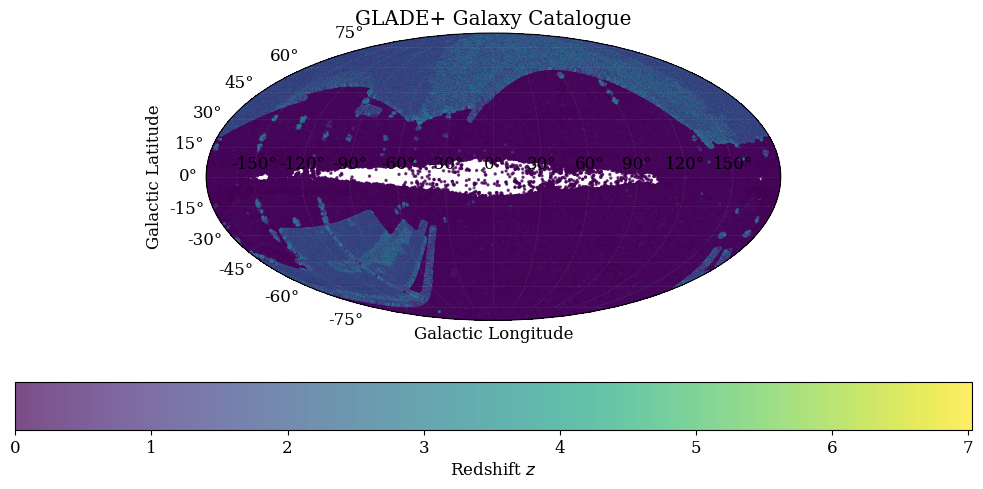

In [11]:

# Plot in galactic coordinates
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

sc = ax.scatter(l_wrapped, b_gal, c=z, s=2, alpha=0.7)

ax.grid(True, linestyle=":", linewidth=0.5)
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
ax.set_title("GLADE+ Galaxy Catalogue")

cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
cbar.set_label(r"Redshift $z$")

plt.tight_layout()
plt.savefig('galaxy_plus.png',dpi=300, bbox_inches='tight')
plt.show()